In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
# Load the inbuilt dataset mnist from keras
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

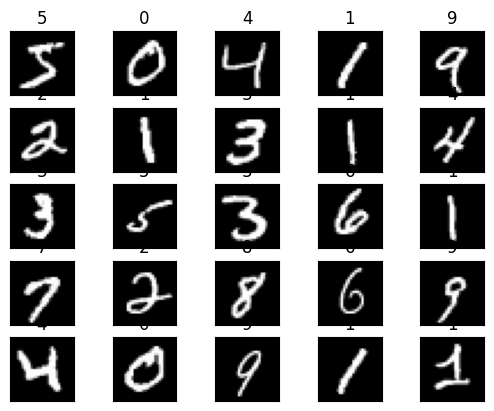

In [5]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])


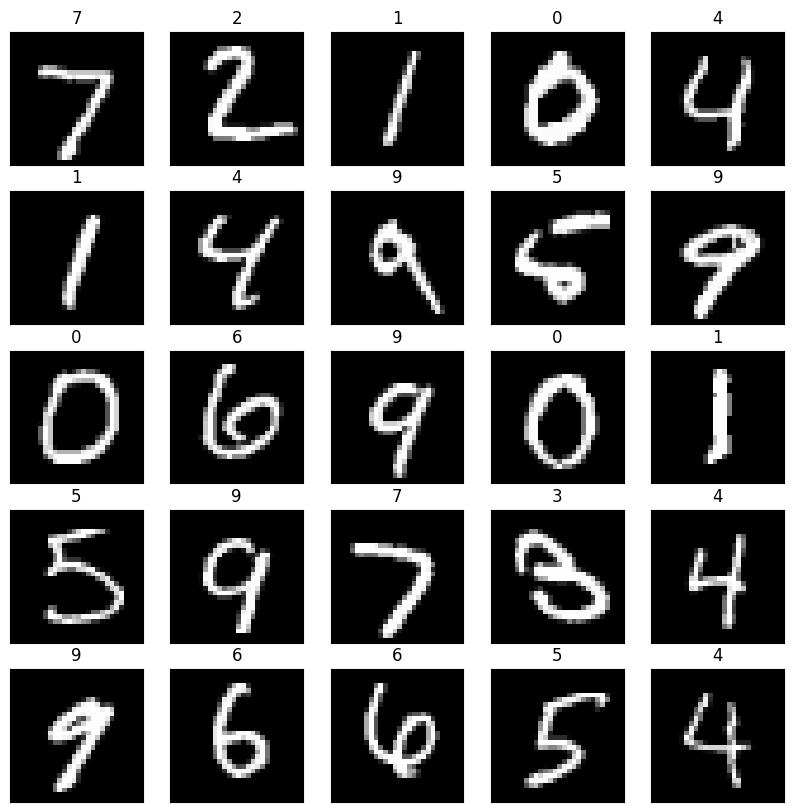

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(y_test[i])
    plt.xticks([])
    plt.yticks([])

#### Data Preparation

In [7]:
# Normalize the data

X_train =X_train /255
X_test = X_test /255

#### Convert 2D to 1D

In [8]:
# view the shape of the image
X_train[0].shape

(28, 28)

In [9]:
num = np.array([[5,6,7], [1,9,3]])

In [10]:
np.reshape(num, num.size)

array([5, 6, 7, 1, 9, 3])

In [11]:
# another medthod
num.reshape(-1)

array([5, 6, 7, 1, 9, 3])

In [12]:
# another method
num.flatten()

array([5, 6, 7, 1, 9, 3])

In [13]:
temp = X_train.flatten()

In [14]:
temp.shape

(47040000,)

In [15]:
temp = X_train.reshape(-1, X_train[0].size)

In [16]:
temp.shape

(60000, 784)

In [17]:
X_train = X_train.reshape(-1, X_train[0].size)
X_test = X_test.reshape(-1, X_test[0].size)

In [18]:
X_train.shape

(60000, 784)

#### Prepare the output variable

<Axes: xlabel='count'>

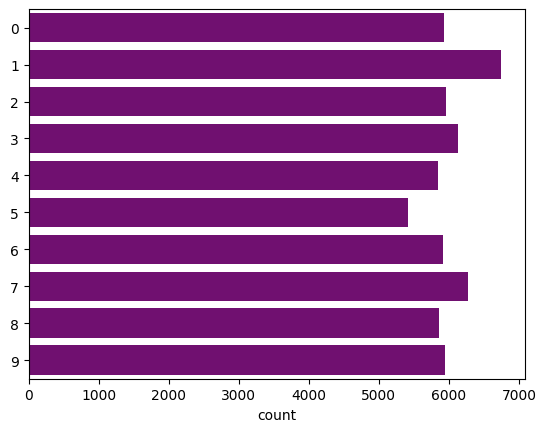

In [19]:
sns.countplot(y = y_train, color="purple")

In [20]:
y_train.shape

(60000,)

In [21]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [22]:
y_train_new.shape

(60000, 10)

In [23]:
y_test_new.shape

(10000, 10)

In [24]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [25]:
model = Sequential()

# input layer
model.add(Input(shape=(784,)))
model.add(Dense(512, activation='relu'))

# hidden layers
model.add(Dense(256, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [26]:
from tensorflow.keras.utils import plot_model

In [27]:
# !pip install pydot

In [28]:
plot_model(model, 
           show_layer_activations=True, 
           show_shapes=True, 
           show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [29]:
# Compile the model

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
                metrics = ['accuracy'])

In [30]:
# Train the model
history = model.fit(X_train, y_train_new, 
                    epochs=10, 
                    batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9019 - loss: 0.3176
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9750 - loss: 0.0819
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9822 - loss: 0.0529
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9878 - loss: 0.0376
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9901 - loss: 0.0307
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9921 - loss: 0.0236
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9936 - loss: 0.0203
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9932 - loss: 0.0193
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9942 - loss: 0.0181
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9955 - loss: 0.0133


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)

In [32]:
# Evaluate the model

model.evaluate(X_test, y_test_new,
               batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9776 - loss: 0.0903


[0.07968728989362717, 0.9824000000953674]

In [58]:
(X_te, y_te), (X_tr, y_tr) = mnist.load_data()

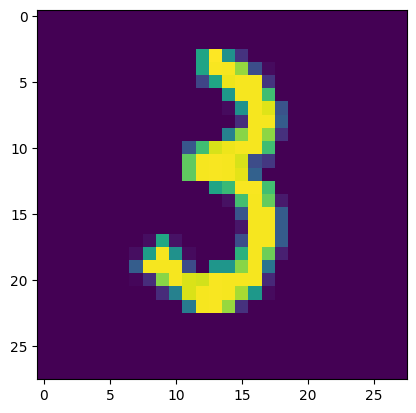

In [61]:
new = X_te[1234]  # a random image '1234' is taken for analysis
plt.imshow(new)

In [62]:
new = new.reshape(1,784)
new = new/255
probs = model.predict(new, verbose=False)
print(probs.argmax())

3


#### predict the character in 'new_char.png' file

In [39]:
# download the new_char.png file from https://mitu.co.in/dataset --> images folder. 
# predict the letter present in it.

In [87]:
import cv2

# Open the image using cv2
img = cv2.imread('images/new-char.png')

# Display the image
cv2.imshow('Image', img)

# Wait for a key event to close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

# Convert the image to a numpy array (though img is already a numpy array with OpenCV)
img_array = img

# Print the shape of the image array
print(img.shape)  # Height x Width x Channels (for BGR)

(260, 269, 3)


In [90]:
import cv2

# Open the image
img = cv2.imread('images/new-char1.jpg', 0) # 0 for grayscale

# Display the image
cv2.imshow('Image', img)

# Wait for a key event to close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print the shape of the image array
print(img.shape)  # Height x Width x Channels (for BGR in OpenCV)

(1031, 1001)
